# Create unified catalog

In [78]:
import pandas as pd

In [79]:
import geopandas as gp

In [80]:
import numpy as np

In [81]:
import matplotlib.pyplot as plt

In [82]:
%matplotlib widget

## COOPS

In [83]:
coops = pd.read_csv('coops_stations.csv')

In [84]:
coops['geometry'] = gp.GeoSeries.from_wkt(coops['geometry'])

In [85]:
gcoops = gp.GeoDataFrame(coops, geometry='geometry')

In [86]:
### get lat/lon
gcoops['lon'] = gcoops['geometry'].x
gcoops['lat'] = gcoops['geometry'].y

In [87]:
gcoops

,nos_id,nws_id,name,state,status,removed,geometry,lon,lat
0,1600012,46125,QREB buoy,NaN,active,NaN,POINT (122.62500 37.75000),122.6250,37.750000
1,1619910,SNDP5,"Sand Island, Midway Islands",NaN,active,NaN,POINT (-177.37500 28.21875),-177.3750,28.218750
2,1630000,APRP7,"Apra Harbor, Guam",NaN,active,NaN,POINT (144.62500 13.44531),144.6250,13.445312
3,1631428,PGBP7,"Pago Bay, Guam",NaN,active,NaN,POINT (144.75000 13.42969),144.7500,13.429688
4,1770000,NSTP6,"Pago Pago, American Samoa",NaN,active,NaN,POINT (-170.75000 -14.27344),-170.7500,-14.273438
...,...,...,...,...,...,...,...,...,...
430,8423898,FTPN3,Fort Point,NH,discontinued,"2020-04-13 00:00:00,2014-08-05 00:00:00,2012-0...",POINT (-70.68750 43.06250),-70.6875,43.062500
431,8726667,MCYF1,Mckay Bay Entrance,FL,discontinued,"2020-05-20 00:00:00,2019-03-08 00:00:00,2017-0...",POINT (-82.43750 27.90625),-82.4375,27.906250
432,8772447,FCGT2,Freeport,TX,discontinued,"2020-05-24 18:45:00,2018-10-10 21:50:00,2018-1...",POINT (-95.31250 28.93750),-95.3125,28.937500
433,9087079,GBWW3,Green Bay,WI,discontinued,"2020-10-28 13:00:00,2007-08-06 23:59:00,2007-0...",POINT (-88.00000 44.53125),-88.0000,44.531250


In [88]:
gcoops = gcoops.loc[gcoops.status=='active']

In [89]:
gcoops = gcoops.drop('geometry',axis=1)

## IOC

In [90]:
ioc = pd.read_csv('ioc3.csv')
ioc = ioc.drop_duplicates()
ioc

,SSC ID,Station Name,Country_x,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,SONEL GPS,SONEL TG,Code,GLOSS ID_y,Country_y,Location
0,SSC-abas,Abashiri,Japan,44.02,144.28,abas,abas,327.0,347,1104,797,2107,abas,327.0,Japan,Abashiri
1,SSC-abed,Aberdeen,United Kingdom,57.14,-2.08,abed,NaN,NaN,NaN,"21, 361",617,"2185, 2735",abed,NaN,UK,Aberdeen
2,SSC-abur,Aburatsu,Japan,31.58,131.41,abur,abur,82.0,354,814,806,2209,abur,82.0,Japan,Aburatsu
3,SSC-acaj,Acajutla,El Salvador,13.57,-89.84,acaj,acaj,182.0,82,"1011, 1302",NaN,2859,acaj,182.0,El Salvador,Acajutla
4,SSC-acap,Acapulco,Mexico,16.83,-99.92,"acap, acap2, acya","acap, acya",267.0,316,686,2279,2280,acap,267.0,Mexico,Acapulco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,SSC-yapi,Yap Island,Micronesia,9.51,138.12,yapi,yapi,119.0,8,"1251, 678",NaN,2842,yapi,119.0,Micronesia,Yap Island
846,SSC-zanz,Zanzibar,Tanzania,-6.15,39.18,zanz,zanz,297.0,151,1600,2615,2614,zanz,297.0,Tanzania,Zanzibar
847,SSC-zhap,Zhapo,China,21.58,111.83,zhap,zhap,78.0,635,933,NaN,2828,zhap,78.0,China,Zhapo
848,SSC-zygi,Zygi,Cyprus,34.73,33.34,"zygi, zygi1",zygi,NaN,NaN,2162,NaN,NaN,zygi,NaN,Cyprus,Zygi


## EMODNET

In [91]:
emodnet = pd.read_csv('emodnet.csv')
emodnet = emodnet.drop_duplicates(['EP_PLATFORM_ID'])
emodnet

,Unnamed: 0,EP_PLATFORM_ID,EP_PLATFORM_TYPE,EP_PLATFORM_CODE,EP_PLATFORM_LINK,TIME_QC (1),latitude (degrees_north),longitude (degrees_east),SLEV_QC (1),SLEV_DM,...,area,author,source,contributor_name,contributor_url,data_assembly_center,institution_edmo_code,institution_references,institution,wmo_platform_code
0,0,8397,TG,AjaccioTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,41.92270,8.76290,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
4,5864277,8425,TG,ArcachonEyracTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,44.66500,-1.16350,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
8,11550389,371096,TG,AudierneTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,48.02155,-4.53758,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
12,13443083,638729,TG,BaliseARouenTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,49.43183,0.11067,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
13,13443197,8447,TG,BayonneBoucauTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,43.52730,-1.51540,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,262348559,8901,TG,SolenzaraTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,41.85686,9.40383,1,D,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
275,266904056,368642,TG,ThioTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,-21.61381,166.24153,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
279,270225196,8985,TG,ToulonTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,43.12280,5.91460,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
283,271731957,371433,TG,TubuaiTG,http://www.emodnet-physics.eu/Map/spi.aspx?id=...,1,-23.34177,-149.47554,1,\u0000,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540,NaN,SHOM Service Hydrographique et Oceanographique...,NaN


## CMEMS

In [92]:
cmems = pd.read_csv('cmems.csv')
cmems = cmems.drop(cmems.columns[0],axis=1)
cmems = cmems.drop_duplicates()

In [93]:
cmems

,PLATFORM_NAME,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE,latitude (degrees_north),longitude (degrees_east)
0,Aarhus,Aarhus,DMI,469,56.1500,10.21670
1,Althagen,Althagen,BSH,1850,54.3769,12.41940
2,Ark\u00f6 mobi,Arko,SMHI,545,58.4843,16.96070
3,Assens,Assens,DMI,469,55.2667,9.88330
4,Bagenkop,Bagenkop,DMI,469,54.7528,10.67780
...,...,...,...,...,...,...
792,Iles Du Salut,IlesDuSalutTG,SHOM Service Hydrographique et Oceanographiqu...,540,5.2500,-52.62000
849,NaN,IDSL-ZygiMarina,Joint Research Centre(JRC);Cyprus Oceanography...,2688 711,34.7263,33.34020
878,NaN,IDSL-Corinth,Joint Research Centre(JRC);National Observator...,2688 1202,37.9425,22.93360
879,NaN,IDSL-Ciutadella,Joint Research Centre(JRC);Instituto Geogr\u00...,2688,39.9876,3.82815


## GESLA

In [94]:
gesla = pd.read_csv('GESLA3_ALL.csv')
gesla

,FILE NAME,SITE NAME,SITE CODE,COUNTRY,CONTRIBUTOR (ABBREVIATED),CONTRIBUTOR (FULL),CONTRIBUTOR WEBSITE,CONTRIBUTOR CONTACT,ORGINATOR,ORIGINATOR WEBSITE,...,START DATE/TIME,END DATE/TIME,NUMBER OF YEARS,TIME ZONE HOURS,DATUM INFORMATION,INSTRUMENT,PRECISION,NULL VALUE,GAUGE TYPE,OVERALL RECORD QUALITY
0,aasiaat-aas-grl-gloss,Aasiaat,AAS,GRL,GLOSS,Global Sea Level Observing System,https://www.gloss-sealevel.org,I.D.Haigh@soton.ac.uk,Global Sea Level Observing System,https://www.gloss-sealevel.org,...,1997/06/26 15:53:00,1999/06/28 11:18:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
1,maniitsoq-man-grl-gloss,Maniitsoq,MAN,GRL,GLOSS,Global Sea Level Observing System,https://www.gloss-sealevel.org,I.D.Haigh@soton.ac.uk,Global Sea Level Observing System,https://www.gloss-sealevel.org,...,1997/06/30 21:02:00,1999/06/20 23:53:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
2,brest-822a-fra-uhslc,Brest,822A,FRA,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,Systeme d'Observation du Niveau des Eaux Litto...,Unspecified,...,1846/01/04 00:00:00,2018/12/31 23:00:00,165,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
3,stockholm-826a-swe-uhslc,Stockholm,826A,SWE,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,Swedish Meteorological and Hydrographical Ins...,Unspecified,...,1889/01/01 00:00:00,2014/12/31 23:00:00,125,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
4,san_francisco_ca-551a-usa-uhslc,San_Francisco_CA,551A,USA,UHSLC,University of Hawaii Sea Level Center,https://uhslc.soest.hawaii.edu,philiprt@hawaii.edu,National Ocean Service (NOS) National Oceani...,Unspecified,...,1897/08/01 08:00:00,2018/12/31 23:00:00,122,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,sian_ka_an-418-mex-unam,Sian_Ka_An,418,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2016/01/01 00:00:00,2018/12/31 23:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5115,sisal-416-mex-unam,Sisal,416,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2011/01/01 00:00:00,2013/12/30 11:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5116,zihuatanejo-509-mex-unam,Zihuatanejo,509,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2011/01/01 00:00:00,2013/12/30 11:00:00,3,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues
5117,celestun-412-mex-unam,Celestun,412,MEX,UNAM,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,mareografico@geofisica.unam.mx,Service Mareographic National Institute of Geo...,http://www.mareografico.unam.mx/portal/,...,2010/01/01 00:00:00,2011/12/31 23:00:00,2,0,Unspecified,Unspecified,Unspecified,-99.9999,Coastal,No obvious issues


For possible future sources we can use gesla sources

In [95]:
gesla['CONTRIBUTOR WEBSITE'].unique()

array(['https://www.gloss-sealevel.org', 'https://uhslc.soest.hawaii.edu',
       'https://jdoss1.jodc.go.jp/vpage/tide.html',
       'https://www.bodc.ac.uk/data/hosted_data_systems/sea_level/uk_tide_gauge_network/',
       'https://coastalmonitoring.org/realtimedata/',
       'https://api.tidesandcurrents.noaa.gov/api/prod/',
       'https://waterdata.usgs.gov/nwis',
       'https://cdec.water.ca.gov/ and https://wdl.water.ca.gov/waterdatalibrary/',
       'https://www.sfwmd.gov/science-data/dbhydro',
       'https://nwfwater.com/Data-Publications/Hydrologic-Data/Active-Stations-Map',
       'https://fiman.nc.gov/',
       'https://isdm-gdsi.gc.ca/isdm-gdsi/twl-mne/inventory-inventaire/index-eng.htm',
       'https://noc.ac.uk', 'https://www.seadatanet.org',
       'https://mareografico.it',
       'https://www.bodc.ac.uk/projects/data_management/european/eseas/',
       'http://refmar.shom.fr/en',
       'https://www.smhi.se/data/oceanografi/ladda-ner-oceanografiska-observationer/#p

### normalize name, lon, lat

In [96]:
gcoops = gcoops.rename(columns={'name':'Station_Name','lon':'Longitude','lat':'Latitude'})

In [97]:
ioc = ioc.rename(columns={'Station Name':'Station_Name'})

In [98]:
cmems = cmems.rename(columns={'PLATFORM_NAME':'Station_Name','longitude (degrees_east)':'Longitude','latitude (degrees_north)':'Latitude'})

In [99]:
emodnet = emodnet.rename(columns={'EP_PLATFORM_CODE':'Station_Name','longitude (degrees_east)':'Longitude','latitude (degrees_north)':'Latitude'})

In [100]:
gesla = gesla.rename(columns={'SITE NAME':'Station_Name','LONGITUDE':'Longitude','LATITUDE':'Latitude'})

## Plot

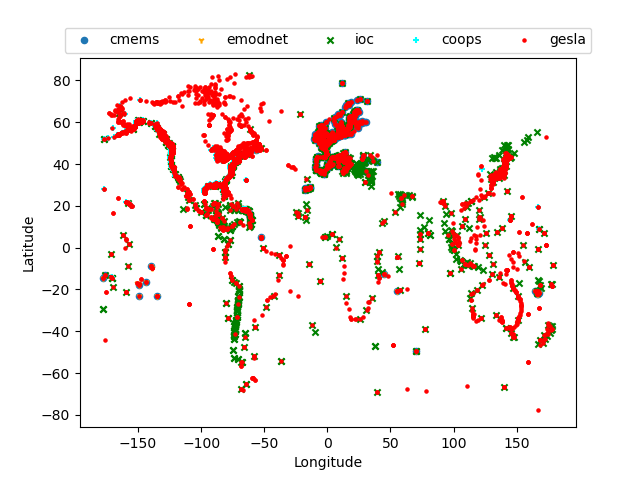

In [101]:
cmems.plot.scatter(x = 'Longitude', y = 'Latitude', marker='o', label='cmems')
a = plt.gca()
emodnet.plot.scatter(ax=a, x = 'Longitude', y = 'Latitude', color='orange', marker='1', label='emodnet')
ioc.plot.scatter(ax=a, x = 'Longitude', y = 'Latitude', color='green', marker='x', label='ioc')
gcoops.plot.scatter(ax=a, x = 'Longitude', y = 'Latitude', color='cyan', marker='+', label='coops')
gesla.plot.scatter(ax=a, x = 'Longitude', y = 'Latitude', color='red', marker='.',label='gesla')
plt.legend(loc='upper center',bbox_to_anchor=(.5, 1.1), ncol=5)

## Merge COOPS & IOC

#### check duplicates

In [102]:
ioc_ = ioc.loc[ioc.Country_x=='United States']
ioc_

,SSC ID,Station_Name,Country_x,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,SONEL GPS,SONEL TG,Code,GLOSS ID_y,Country_y,Location
5,SSC-acnj,Atlantic City,United States,39.36,-74.42,"acnj, acnj2",acnj,220.0,264,180,2923,2876,acnj,220.0,USA,Atlantic City
6,SSC-acnj,Atlantic City,United States,39.36,-74.42,"acnj, acnj2",acnj,220.0,264,180,2923,2876,acnj2,220.0,USA,Atlantic City
7,SSC-adak,Adak,United States,51.86,-176.63,"adak, adak2",adak,302.0,40,487,2667,2666,adak,302.0,USA,Adak
8,SSC-adak,Adak,United States,51.86,-176.63,"adak, adak2",adak,302.0,40,487,2667,2666,adak2,302.0,USA,Adak
13,SSC-alak,Alitak,United States,56.90,-154.25,"alak, alak2",alak,NaN,NaN,NaN,NaN,NaN,alak,NaN,USA,Alitak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,SSC-sitk,Sitka,United States,57.05,-135.34,"sitk, sitk2",sitk,154.0,559,426,"2683, 2684",2682,sitk2,154.0,USA,Sitka
814,SSC-vieq,Vieques,United States,18.09,-65.47,"vieq, vieq2","vieq, viqu",NaN,NaN,NaN,NaN,NaN,vieq,NaN,USA,Vieques
815,SSC-vieq,Vieques,United States,18.09,-65.47,"vieq, vieq2","vieq, viqu",NaN,NaN,NaN,NaN,NaN,vieq2,NaN,USA,Vieques
842,SSC-yaku,Yakutat,United States,59.55,-139.74,"yaku, yaku2",yaku,NaN,570,445,NaN,NaN,yaku,NaN,USA,Yakutat


In [103]:
ioc_.Country_y.unique()

array(['USA', 'Hawaii', 'New Zealand', 'UK', 'Australia'], dtype=object)

In [104]:
m1 = pd.merge(ioc_,gcoops, on=['Station_Name']).Station_Name

In [105]:
m1

0     Atlantic City
1     Atlantic City
2            Alitak
3            Alitak
4           Alameda
          ...      
58      South Beach
59           Seward
60           Seward
61            Sitka
62            Sitka
Name: Station_Name, Length: 63, dtype: object

In [106]:
i1 = ioc_.loc[ioc_.Station_Name.isin(m1)]
i1 = i1.drop_duplicates(['Station_Name']).reset_index(drop=True)
i1 = i1.sort_values('Station_Name').reset_index(drop=True)
i1

,SSC ID,Station_Name,Country_x,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,SONEL GPS,SONEL TG,Code,GLOSS ID_y,Country_y,Location
0,SSC-alam,Alameda,United States,37.77,-122.30,"alam, alam2",alam,NaN,NaN,437,3319,3318,alam,NaN,USA,Alameda
1,SSC-alak,Alitak,United States,56.90,-154.25,"alak, alak2",alak,NaN,NaN,NaN,NaN,NaN,alak,NaN,USA,Alitak
2,SSC-anch,Anchorage,United States,61.24,-149.89,"anch, anch2",anch,NaN,NaN,1067,1897,2104,anch,NaN,USA,Anchorage
3,SSC-apfl,Apalachicola,United States,29.73,-84.98,"apfl, apfl2",apfl,NaN,760,1193,NaN,NaN,apfl,NaN,USA,Apalachicola
4,SSC-aren,Arena Cove,United States,38.91,-123.71,"aren, aren2",aren,NaN,573,2125,3026,3025,aren,NaN,USA,Arena Cove
5,SSC-asto,Astoria,United States,46.21,-123.77,"asto, asto2",asto,NaN,572,265,"2093, 2690, 2691, 675",2176,asto,NaN,USA,Astoria
6,SSC-acnj,Atlantic City,United States,39.36,-74.42,"acnj, acnj2",acnj,220.0,264,180,2923,2876,acnj,220.0,USA,Atlantic City
7,SSC-bame,Bar Harbor,United States,44.39,-68.21,"bame, bame2",bame,NaN,NaN,525,635,2353,bame,NaN,USA,Bar Harbor
8,SSC-boma,Boston,United States,42.36,-71.05,"boma, boma2",boma,NaN,741,235,NaN,NaN,boma,NaN,USA,Boston
9,SSC-bgct,Bridgeport,United States,41.17,-73.18,"bgct, bgct2",bgct,NaN,NaN,1068,NaN,NaN,bgct,NaN,USA,Bridgeport


In [107]:
g1 = gcoops.loc[gcoops.Station_Name.isin(m1)]
g1 = g1.sort_values('Station_Name').reset_index(drop=True)
g1

,nos_id,nws_id,Station_Name,state,status,removed,Longitude,Latitude
0,9414750,AAMC1,Alameda,CA,active,"2019-12-03 00:00:00,2017-12-02 00:00:00,2016-0...",-122.3125,37.781250
1,9457804,ALIA2,Alitak,AK,active,"2021-10-14 00:00:00,2018-06-28 00:00:00,2015-0...",-154.2500,56.906250
2,9455920,ANTA2,Anchorage,AK,active,"2015-08-26 00:00:00,2015-07-27 23:59:00,2012-0...",-149.8750,61.250000
3,8728690,APCF1,Apalachicola,FL,active,"2019-12-17 00:00:00,2019-12-10 16:15:00,2018-1...",-85.0000,29.734375
4,9416841,ANVC1,Arena Cove,CA,active,"2020-10-08 16:54:00,2019-10-16 17:20:00,2019-1...",-123.6875,38.906250
5,9439040,ASTO3,Astoria,OR,active,"2021-07-10 10:15:00,2019-05-14 21:36:00,2018-0...",-123.7500,46.218750
6,8534720,ACYN4,Atlantic City,NJ,active,"2019-05-21 14:59:00,2018-06-08 00:00:00,2018-0...",-74.4375,39.343750
7,8413320,ATGM1,Bar Harbor,ME,active,"2021-03-22 11:14:00,2018-08-06 00:00:00,2017-0...",-68.1875,44.406250
8,8443970,BHBM3,Boston,MA,active,"2021-04-21 00:00:00,2019-09-26 00:00:00,2019-0...",-71.0625,42.343750
9,8467150,BRHC3,Bridgeport,CT,active,"2016-12-07 00:00:00,2016-12-06 17:24:00,2016-1...",-73.1875,41.187500


### Lat/Lon differences

In [108]:
np.abs(i1.Longitude - g1.Longitude).max()

0.05500000000000682

In [109]:
np.abs(i1.Latitude - g1.Latitude).max()

0.05000000000000071

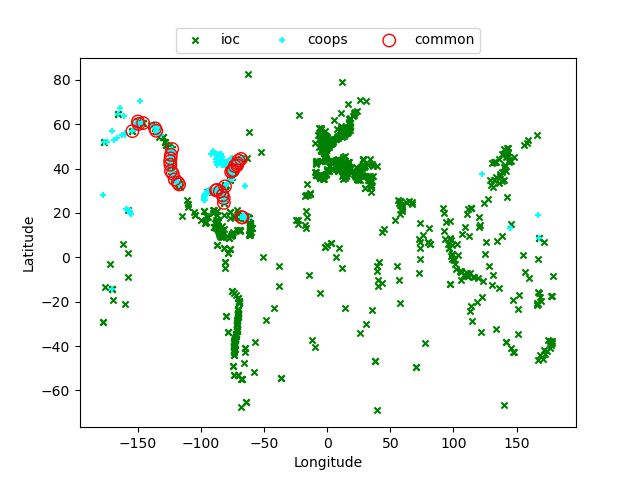

In [110]:
ioc.plot.scatter(x = 'Longitude', y = 'Latitude', color='green', marker='x', label='ioc')
a = plt.gca()
gcoops.plot.scatter(ax=a, x = 'Longitude', y = 'Latitude', color='cyan', marker='+', label='coops')

plt.scatter(x=i1.Longitude, y=i1.Latitude, s=80, facecolors='none', edgecolors='r', label='common')
plt.legend(loc='upper center',bbox_to_anchor=(.5, 1.1), ncol=3)

In [111]:
unique = gcoops[~gcoops.Station_Name.isin(m1)]
unique

,nos_id,nws_id,Station_Name,state,status,removed,Longitude,Latitude
0,1600012,46125,QREB buoy,NaN,active,NaN,122.6250,37.750000
1,1619910,SNDP5,"Sand Island, Midway Islands",NaN,active,NaN,-177.3750,28.218750
2,1630000,APRP7,"Apra Harbor, Guam",NaN,active,NaN,144.6250,13.445312
3,1631428,PGBP7,"Pago Bay, Guam",NaN,active,NaN,144.7500,13.429688
4,1770000,NSTP6,"Pago Pago, American Samoa",NaN,active,NaN,-170.7500,-14.273438
...,...,...,...,...,...,...,...,...
360,8736163,MBPA1,"Middle Bay Port Visibility, Mobile Bay",AL,active,"2022-02-08 00:00:00,2016-07-07 02:00:00,2015-0...",-88.0625,30.531250
361,8775132,LQAT2,La Quinta Channel North,TX,active,"2022-02-17 00:00:00,2020-04-27 23:58:00",-97.2500,27.875000
362,8516945,KPTN6,Kings Point,NY,active,"2022-02-23 10:15:00,2018-03-20 13:00:00,2015-1...",-73.7500,40.812500
363,9052000,CAVN6,Cape Vincent,NY,active,"2022-03-08 00:00:00,2015-11-17 14:30:00,2010-0...",-76.3125,44.125000


#### normalize country column

In [112]:
ioc = ioc.rename(columns={'Country_x':'Country'})

In [113]:
gcoops['Country'] = 'United States'

In [114]:
catalog = ioc.append(gcoops)

catalog.reset_index(inplace=True,drop=True)
catalog

,SSC ID,Station_Name,Country,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,SONEL TG,Code,GLOSS ID_y,Country_y,Location,nos_id,nws_id,state,status,removed
0,SSC-abas,Abashiri,Japan,44.02000,144.2800,abas,abas,327.0,347,1104,...,2107,abas,327.0,Japan,Abashiri,NaN,NaN,NaN,NaN,NaN
1,SSC-abed,Aberdeen,United Kingdom,57.14000,-2.0800,abed,NaN,NaN,NaN,"21, 361",...,"2185, 2735",abed,NaN,UK,Aberdeen,NaN,NaN,NaN,NaN,NaN
2,SSC-abur,Aburatsu,Japan,31.58000,131.4100,abur,abur,82.0,354,814,...,2209,abur,82.0,Japan,Aburatsu,NaN,NaN,NaN,NaN,NaN
3,SSC-acaj,Acajutla,El Salvador,13.57000,-89.8400,acaj,acaj,182.0,82,"1011, 1302",...,2859,acaj,182.0,El Salvador,Acajutla,NaN,NaN,NaN,NaN,NaN
4,SSC-acap,Acapulco,Mexico,16.83000,-99.9200,"acap, acap2, acya","acap, acya",267.0,316,686,...,2280,acap,267.0,Mexico,Acapulco,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,NaN,"Middle Bay Port Visibility, Mobile Bay",United States,30.53125,-88.0625,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8736163.0,MBPA1,AL,active,"2022-02-08 00:00:00,2016-07-07 02:00:00,2015-0..."
1211,NaN,La Quinta Channel North,United States,27.87500,-97.2500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8775132.0,LQAT2,TX,active,"2022-02-17 00:00:00,2020-04-27 23:58:00"
1212,NaN,Kings Point,United States,40.81250,-73.7500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8516945.0,KPTN6,NY,active,"2022-02-23 10:15:00,2018-03-20 13:00:00,2015-1..."
1213,NaN,Cape Vincent,United States,44.12500,-76.3125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9052000.0,CAVN6,NY,active,"2022-03-08 00:00:00,2015-11-17 14:30:00,2010-0..."


### test it

In [115]:
minlat = g1.Latitude.min(),
maxlat = g1.Latitude.max(),
minlon = g1.Longitude.min(),
maxlon = g1.Longitude.max(),

In [116]:
w = catalog.loc[(catalog['Longitude'] > minlon) & (catalog['Longitude'] < maxlon) & (catalog['Latitude'] > minlat) & (catalog['Latitude'] < maxlat)]

In [117]:
w.reset_index(inplace=True, drop=True)

In [118]:
w

,SSC ID,Station_Name,Country,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,SONEL TG,Code,GLOSS ID_y,Country_y,Location,nos_id,nws_id,state,status,removed
0,SSC-acnj,Atlantic City,United States,39.36000,-74.4200,"acnj, acnj2",acnj,220.0,264,180,...,2876,acnj,220.0,USA,Atlantic City,NaN,NaN,NaN,NaN,NaN
1,SSC-acnj,Atlantic City,United States,39.36000,-74.4200,"acnj, acnj2",acnj,220.0,264,180,...,2876,acnj2,220.0,USA,Atlantic City,NaN,NaN,NaN,NaN,NaN
2,SSC-alam,Alameda,United States,37.77000,-122.3000,"alam, alam2",alam,NaN,NaN,437,...,3318,alam,NaN,USA,Alameda,NaN,NaN,NaN,NaN,NaN
3,SSC-alam,Alameda,United States,37.77000,-122.3000,"alam, alam2",alam,NaN,NaN,437,...,3318,alam2,NaN,USA,Alameda,NaN,NaN,NaN,NaN,NaN
4,SSC-alva,Alvarado,Mexico,18.77000,-95.7700,"alva, alva2",NaN,NaN,NaN,768,...,NaN,alva,NaN,Mexico,Alvarado,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,NaN,"Middle Bay Port Visibility, Mobile Bay",United States,30.53125,-88.0625,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8736163.0,MBPA1,AL,active,"2022-02-08 00:00:00,2016-07-07 02:00:00,2015-0..."
430,NaN,La Quinta Channel North,United States,27.87500,-97.2500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8775132.0,LQAT2,TX,active,"2022-02-17 00:00:00,2020-04-27 23:58:00"
431,NaN,Kings Point,United States,40.81250,-73.7500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8516945.0,KPTN6,NY,active,"2022-02-23 10:15:00,2018-03-20 13:00:00,2015-1..."
432,NaN,Cape Vincent,United States,44.12500,-76.3125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9052000.0,CAVN6,NY,active,"2022-03-08 00:00:00,2015-11-17 14:30:00,2010-0..."


In [119]:
w.loc[~w.Code.isna()] # these can be downloaded from IOC

,SSC ID,Station_Name,Country,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,SONEL TG,Code,GLOSS ID_y,Country_y,Location,nos_id,nws_id,state,status,removed
0,SSC-acnj,Atlantic City,United States,39.36,-74.42,"acnj, acnj2",acnj,220.0,264,180,...,2876,acnj,220.0,USA,Atlantic City,NaN,NaN,NaN,NaN,NaN
1,SSC-acnj,Atlantic City,United States,39.36,-74.42,"acnj, acnj2",acnj,220.0,264,180,...,2876,acnj2,220.0,USA,Atlantic City,NaN,NaN,NaN,NaN,NaN
2,SSC-alam,Alameda,United States,37.77,-122.30,"alam, alam2",alam,NaN,NaN,437,...,3318,alam,NaN,USA,Alameda,NaN,NaN,NaN,NaN,NaN
3,SSC-alam,Alameda,United States,37.77,-122.30,"alam, alam2",alam,NaN,NaN,437,...,3318,alam2,NaN,USA,Alameda,NaN,NaN,NaN,NaN,NaN
4,SSC-alva,Alvarado,Mexico,18.77,-95.77,"alva, alva2",NaN,NaN,NaN,768,...,NaN,alva,NaN,Mexico,Alvarado,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,SSC-vibc,Victoria Harbor,Canada,48.42,-123.37,vibc,vibc,NaN,NaN,NaN,...,NaN,vibc,NaN,Canada,Victoria Harbor,NaN,NaN,NaN,NaN,NaN
109,SSC-wint,Winter Harbour,Canada,50.51,-128.03,"whbc, wint",NaN,NaN,NaN,1799,...,2164,whbc,NaN,Canada,Winter Harbour,NaN,NaN,NaN,NaN,NaN
110,SSC-wint,Winter Harbour,Canada,50.51,-128.03,"whbc, wint",NaN,NaN,NaN,1799,...,2164,wint,NaN,Canada,Winter Harbour,NaN,NaN,NaN,NaN,NaN
111,SSC-yaku,Yakutat,United States,59.55,-139.74,"yaku, yaku2",yaku,NaN,570,445,...,NaN,yaku,NaN,USA,Yakutat,NaN,NaN,NaN,NaN,NaN


In [120]:
w.loc[~w.nos_id.isna()] # these can be downloaded from COOPS

,SSC ID,Station_Name,Country,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,SONEL TG,Code,GLOSS ID_y,Country_y,Location,nos_id,nws_id,state,status,removed
113,NaN,Middle Tampa Bay,United States,27.656250,-82.6250,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8726412.0,MTBF1,NaN,active,NaN
114,NaN,East Bay Causeway,United States,27.921875,-82.4375,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8726679.0,TSHF1,FL,active,NaN
115,NaN,TPA Cruise Terminal 2,United States,27.937500,-82.4375,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8726694.0,TPAF1,FL,active,NaN
116,NaN,"Weeks Bay, Mobile Bay",United States,30.421875,-87.8125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8732828.0,WBYA1,NaN,active,NaN
117,NaN,I-10 Bonnet Carre Floodway,United States,30.062500,-90.3750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8762483.0,BCFL1,NaN,active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,NaN,"Middle Bay Port Visibility, Mobile Bay",United States,30.531250,-88.0625,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8736163.0,MBPA1,AL,active,"2022-02-08 00:00:00,2016-07-07 02:00:00,2015-0..."
430,NaN,La Quinta Channel North,United States,27.875000,-97.2500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8775132.0,LQAT2,TX,active,"2022-02-17 00:00:00,2020-04-27 23:58:00"
431,NaN,Kings Point,United States,40.812500,-73.7500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8516945.0,KPTN6,NY,active,"2022-02-23 10:15:00,2018-03-20 13:00:00,2015-1..."
432,NaN,Cape Vincent,United States,44.125000,-76.3125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9052000.0,CAVN6,NY,active,"2022-03-08 00:00:00,2015-11-17 14:30:00,2010-0..."


In [121]:
w[w.duplicated('Station_Name')] # these can be downloaded from both

,SSC ID,Station_Name,Country,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,SONEL TG,Code,GLOSS ID_y,Country_y,Location,nos_id,nws_id,state,status,removed
1,SSC-acnj,Atlantic City,United States,39.360000,-74.4200,"acnj, acnj2",acnj,220.0,264,180,...,2876,acnj2,220.0,USA,Atlantic City,NaN,NaN,NaN,NaN,NaN
3,SSC-alam,Alameda,United States,37.770000,-122.3000,"alam, alam2",alam,NaN,NaN,437,...,3318,alam2,NaN,USA,Alameda,NaN,NaN,NaN,NaN,NaN
6,SSC-anch,Anchorage,United States,61.240000,-149.8900,"anch, anch2",anch,NaN,NaN,1067,...,2104,anch2,NaN,USA,Anchorage,NaN,NaN,NaN,NaN,NaN
8,SSC-apfl,Apalachicola,United States,29.730000,-84.9800,"apfl, apfl2",apfl,NaN,760,1193,...,NaN,apfl2,NaN,USA,Apalachicola,NaN,NaN,NaN,NaN,NaN
10,SSC-aren,Arena Cove,United States,38.910000,-123.7100,"aren, aren2",aren,NaN,573,2125,...,3025,aren2,NaN,USA,Arena Cove,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,NaN,Charleston,United States,43.343750,-124.3125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9432780.0,CHAO3,OR,active,"2021-08-21 11:00:00,2021-08-21 00:00:00,2019-0..."
361,NaN,Fort Pulaski,United States,32.031250,-80.8750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8670870.0,FPKG1,GA,active,"2021-08-25 11:00:00,2021-08-25 00:00:00,2021-0..."
368,NaN,Seward,United States,60.125000,-149.3750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9455090.0,SWLA2,AK,active,"2021-09-05 00:35:00,2020-09-23 19:12:00,2017-0..."
373,NaN,Windmill Point,United States,37.625000,-76.3125,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8636580.0,WNDV2,VA,active,"2021-09-14 15:41:00,2018-06-20 13:05:00,2011-0..."


#### check duplicates with CMEMS

In [122]:
d = cmems.Station_Name.isin(catalog.Station_Name)
d.sum()

104

In [123]:
db2 = cmems[d].sort_values('Station_Name')
db2 = db2.reset_index(drop=True)

In [124]:
db2_ = catalog.loc[catalog.Station_Name.isin(cmems[d].Station_Name)].sort_values('Station_Name')
db2_ = db2_.dropna(axis=1)
db2_ = db2_.drop_duplicates(['Station_Name','Country'])
db2_ = db2_.drop_duplicates('Station_Name')
db2_ = db2_.reset_index(drop=True)

### Lat/Lon differences

In [125]:
np.abs(db2.Longitude.values - db2_.Longitude.values).max()

76.83667

In [126]:
np.abs(db2.Latitude.values - db2_.Latitude.values).max()

30.68

In [127]:
db2.Longitude - db2_.Longitude

0     -0.00333
1      0.00290
2      0.00175
3      0.00242
4      0.00080
        ...   
99    -0.00240
100    0.00440
101    0.00350
102   -0.00667
103    0.00333
Name: Longitude, Length: 104, dtype: float64

In [128]:
db2

,Station_Name,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE,Latitude,Longitude
0,Aberdeen,Aberdeen,National Oceanography Centre (United_Kingdom),2424,57.150000,-2.08333
1,Ajaccio,AjaccioTG,SHOM Service Hydrographique et Oceanographiqu...,540,41.922700,8.76290
2,Amasra,amas,General Command of Mapping (Turkey),1014,41.744358,32.39175
3,Audierne,AudierneTG,SHOM Service Hydrographique et Oceanographiqu...,540,48.021550,-4.53758
4,Bangor,Bangor,National Oceanography Centre (United_Kingdom),2424,54.665000,-5.66920
...,...,...,...,...,...,...
99,Vinga2,Vinga2,SMHI,545,57.631700,11.60760
100,Visby,Visby,SMHI,545,57.639200,18.28440
101,Weymouth,Weymouth,National Oceanography Centre (United_Kingdom),2424,50.607900,-2.44650
102,Whitby,Whitby,National Oceanography Centre (United_Kingdom),2424,54.483300,-0.61667


In [129]:
mf = (np.abs(db2.Longitude - db2_.Longitude)<.1)

In [130]:
db2[~mf]

,Station_Name,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE,Latitude,Longitude
20,Dover,Dover,National Oceanography Centre (United_Kingdom),2424,51.1167,1.31667
46,Lagos,LagosTG,Dire\u00e7\u00e3o-Geral do Territ\u00f3rio (Po...,4609,37.1000,-8.66670
64,Newport,Newport,National Oceanography Centre (United_Kingdom),2424,51.5496,-2.98600


In [131]:
db2_[~mf]

,Station_Name,Country,Latitude,Longitude
20,Dover,United States,39.16,-75.5200
46,Lagos,Nigeria,6.42,3.4100
64,Newport,United States,41.50,-71.3125


In [132]:
db2 = db2[mf]
db2_ = db2_[mf]

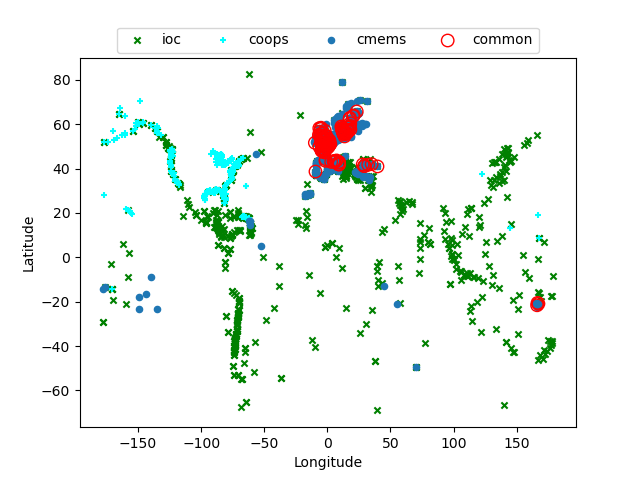

In [133]:
ioc.plot.scatter(x = 'Longitude', y = 'Latitude', color='green', marker='x', label='ioc')
a = plt.gca()
gcoops.plot.scatter(ax=a, x = 'Longitude', y = 'Latitude', color='cyan', marker='+', label='coops')
cmems.plot.scatter(ax=a, x = 'Longitude', y = 'Latitude', marker='o', label='cmems')
plt.scatter(x=db2.Longitude, y=db2.Latitude, s=80, facecolors='none', edgecolors='r', label='common')
plt.legend(loc='upper center',bbox_to_anchor=(.5, 1.1), ncol=4)

### merge cmems

In [134]:
catalog = catalog.append(cmems)

catalog.reset_index(inplace=True,drop=True)
catalog

,SSC ID,Station_Name,Country,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,Country_y,Location,nos_id,nws_id,state,status,removed,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE
0,SSC-abas,Abashiri,Japan,44.0200,144.28000,abas,abas,327.0,347,1104,...,Japan,Abashiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SSC-abed,Aberdeen,United Kingdom,57.1400,-2.08000,abed,NaN,NaN,NaN,"21, 361",...,UK,Aberdeen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SSC-abur,Aburatsu,Japan,31.5800,131.41000,abur,abur,82.0,354,814,...,Japan,Aburatsu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SSC-acaj,Acajutla,El Salvador,13.5700,-89.84000,acaj,acaj,182.0,82,"1011, 1302",...,El Salvador,Acajutla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SSC-acap,Acapulco,Mexico,16.8300,-99.92000,"acap, acap2, acya","acap, acya",267.0,316,686,...,Mexico,Acapulco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,NaN,Iles Du Salut,NaN,5.2500,-52.62000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IlesDuSalutTG,SHOM Service Hydrographique et Oceanographiqu...,540
1735,NaN,NaN,NaN,34.7263,33.34020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDSL-ZygiMarina,Joint Research Centre(JRC);Cyprus Oceanography...,2688 711
1736,NaN,NaN,NaN,37.9425,22.93360,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDSL-Corinth,Joint Research Centre(JRC);National Observator...,2688 1202
1737,NaN,NaN,NaN,39.9876,3.82815,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDSL-Ciutadella,Joint Research Centre(JRC);Instituto Geogr\u00...,2688


### test IOC and CMEMS data

In [135]:
cc = catalog.loc[catalog.Station_Name.isin(db2_.Station_Name)]

In [136]:
cc.loc[cc.Station_Name=="Bangor"]

,SSC ID,Station_Name,Country,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,Country_y,Location,nos_id,nws_id,state,status,removed,PLATFORM_CODE,INSTITUTION,INSTITUTION_EDMO_CODE
67,SSC-bang,Bangor,United Kingdom,54.660,-5.6700,bang,NaN,NaN,NaN,1856,...,UK,Bangor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1476,NaN,Bangor,NaN,54.665,-5.6692,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangor,National Oceanography Centre (United_Kingdom),2424


#### IOC

In [137]:
url = "http://www.ioc-sealevelmonitoring.org/bgraph.php?code={}&output=tab&period=30&endtime={}".format('bang','2022-4-12') # use IOC code value
url

'http://www.ioc-sealevelmonitoring.org/bgraph.php?code=bang&output=tab&period=30&endtime=2022-4-12'

In [138]:
data = pd.read_html(url, header=0)[0]
data['Time (UTC)'] = pd.DatetimeIndex(data['Time (UTC)'])
data = data.set_index('Time (UTC)')
data.columns = ['slev']
data['slev'] = data['slev'].apply(pd.to_numeric)
data

,slev
Time (UTC),
2022-03-12 23:00:00,2.188
2022-03-12 23:15:00,2.115
2022-03-12 23:30:00,2.049
2022-03-12 23:45:00,1.993
2022-03-13 00:00:00,1.922
...,...
2022-04-11 23:00:00,2.338
2022-04-11 23:15:00,2.259
2022-04-11 23:30:00,2.174


#### CMEMS

In [139]:
from erddapy import ERDDAP


e = ERDDAP(
  server="https://nrt.cmems-du.eu/erddap",
  protocol="tabledap",
)


In [140]:
e.dataset_id = 'copernicus_GLO_insitu_nrt_TG'

In [141]:
e.constraints = {
    "time>=": "2022-03-12 T00:00:00Z",
    "time<=": "2022-04-12 T00:00:00Z",
    "PLATFORM_CODE=": "Bangor",
}


In [142]:
e.variables = [
    "time",
    "SLEV"
]


In [143]:
df = e.to_pandas()#low_memory=False)

df['time (UTC)'] = pd.DatetimeIndex(df['time (UTC)'])
df = df.set_index('time (UTC)')

df.index = df.index.tz_convert(None)
df.columns = ['slev']
df['slev'] = df['slev'].apply(pd.to_numeric)
df

,slev
time (UTC),
2022-03-27 00:00:00,1.034
2022-03-27 00:15:00,1.022
2022-03-27 00:30:00,1.019
2022-03-27 00:45:00,1.047
2022-03-27 01:00:00,1.076
...,...
2022-04-11 23:00:00,2.338
2022-04-11 23:15:00,2.259
2022-04-11 23:30:00,2.174


In [144]:
(data['2022-03-27 0:0:0':'2022-04-12 0:0:0'] - df['2022-03-13 0:0:0':'2022-04-12 0:0:0']).max()

slev    0.0
dtype: float64

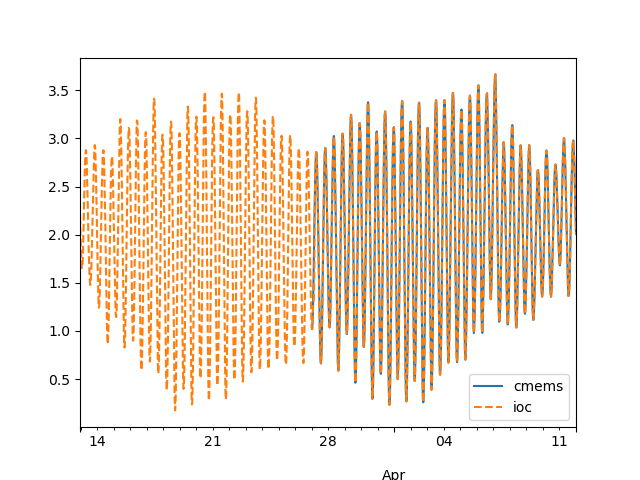

In [145]:
df.plot()
p=plt.gca()
data.plot(ax=p, linestyle='--')
plt.legend(['cmems','ioc'])

#### check duplicates with EMODNET

In [146]:
de = emodnet.Station_Name.isin(catalog.Station_Name)
de.sum()

0

### merge emodnet

In [147]:
catalog = catalog.append(emodnet)

catalog.reset_index(inplace=True,drop=True)
catalog

,SSC ID,Station_Name,Country,Latitude,Longitude,IOC code,PTWC code,GLOSS ID_x,UHSLC ID,PSMSL ID,...,area,author,source,contributor_name,contributor_url,data_assembly_center,institution_edmo_code,institution_references,institution,wmo_platform_code
0,SSC-abas,Abashiri,Japan,44.02000,144.28000,abas,abas,327.0,347,1104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SSC-abed,Aberdeen,United Kingdom,57.14000,-2.08000,abed,NaN,NaN,NaN,"21, 361",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SSC-abur,Aburatsu,Japan,31.58000,131.41000,abur,abur,82.0,354,814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SSC-acaj,Acajutla,El Salvador,13.57000,-89.84000,acaj,acaj,182.0,82,"1011, 1302",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SSC-acap,Acapulco,Mexico,16.83000,-99.92000,"acap, acap2, acya","acap, acya",267.0,316,686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,NaN,SolenzaraTG,NaN,41.85686,9.40383,NaN,NaN,NaN,NaN,NaN,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540.0,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
1812,NaN,ThioTG,NaN,-21.61381,166.24153,NaN,NaN,NaN,NaN,NaN,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540.0,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
1813,NaN,ToulonTG,NaN,43.12280,5.91460,NaN,NaN,NaN,NaN,NaN,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540.0,NaN,SHOM Service Hydrographique et Oceanographique...,NaN
1814,NaN,TubuaiTG,NaN,-23.34177,-149.47554,NaN,NaN,NaN,NaN,NaN,...,Global Ocean,NaN,land/onshore structure,NaN,NaN,Ifremer,540.0,NaN,SHOM Service Hydrographique et Oceanographique...,NaN


In [148]:
catalog.duplicated('Station_Name').sum()

428

In [149]:
catalog.to_csv('catalog.csv')